In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set pandas options for better display
pd.set_option('display.max_columns', None)

# Define base directory
BASE_DIR = os.path.dirname(os.getcwd())  # if you run from `scripts/`
#CSV_PATH = os.path.join(BASE_DIR, 'data', 'healthcare_dataset.csv')
CSV_PATH = os.path.join(BASE_DIR, 'data', 'cleaned_healthcare_dataset.csv')

In [10]:
# Load dataset
df = pd.read_csv(CSV_PATH)
df.head()

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key
0,bobby_jackson,30,male,b-,cancer,2024-01-31,matthew_smith,sons_and_miller,blue_cross,18856.281306,328,urgent,2024-02-02,paracetamol,normal,bobby_jackson_2024-01-31_sons_and_miller
1,leslie_terry,62,male,a+,obesity,2019-08-20,samantha_davies,kim_inc,medicare,33643.327287,265,emergency,2019-08-26,ibuprofen,inconclusive,leslie_terry_2019-08-20_kim_inc
2,danny_smith,76,female,a-,obesity,2022-09-22,tiffany_mitchell,cook_plc,aetna,27955.096079,205,emergency,2022-10-07,aspirin,normal,danny_smith_2022-09-22_cook_plc
3,andrew_watts,28,female,o+,diabetes,2020-11-18,kevin_wells,"hernandez_rogers_and_vang,",medicare,37909.782410,450,elective,2020-12-18,ibuprofen,abnormal,andrew_watts_2020-11-18_hernandez_rogers_and_v...
4,adrienne_bell,43,female,ab+,cancer,2022-09-19,kathleen_hanna,white-white,aetna,14238.317814,458,urgent,2022-10-09,penicillin,abnormal,adrienne_bell_2022-09-19_white-white


In [11]:
# Display basic information about the DataFrame
df.shape  # number of rows, columns
df.info()  # data types, nulls
df.describe(include='all')  # stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                54966 non-null  object 
 1   age                 54966 non-null  int64  
 2   gender              54966 non-null  object 
 3   blood_type          54966 non-null  object 
 4   medical_condition   54966 non-null  object 
 5   date_of_admission   54966 non-null  object 
 6   doctor              54966 non-null  object 
 7   hospital            54966 non-null  object 
 8   insurance_provider  54966 non-null  object 
 9   billing_amount      54966 non-null  float64
 10  room_number         54966 non-null  int64  
 11  admission_type      54966 non-null  object 
 12  discharge_date      54966 non-null  object 
 13  medication          54966 non-null  object 
 14  test_results        54966 non-null  object 
 15  patient_key         54966 non-null  object 
dtypes: f

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key
count,54966,54966.000000,54966,54966,54966,54966,54966,54966,54966,54966.000000,54966.000000,54966,54966,54966,54966,54966
unique,40235,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3,50000
top,michael_williams,NaN,male,a-,arthritis,2024-03-16,michael_smith,llc_smith,cigna,NaN,NaN,elective,2020-03-15,lipitor,abnormal,katherine_webster_2022-01-26_carter_inc
freq,24,NaN,27496,6898,9218,50,27,44,11139,NaN,NaN,18473,53,11038,18437,2
mean,NaN,51.535185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25544.306284,301.124404,NaN,NaN,NaN,NaN,NaN
std,NaN,19.605661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14208.409711,115.223143,NaN,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13243.718641,202.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25542.749145,302.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37819.858159,401.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
#4. Cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^a-z0-9_]', '', regex=True)
df.columns.tolist()

['name',
 'age',
 'gender',
 'blood_type',
 'medical_condition',
 'date_of_admission',
 'doctor',
 'hospital',
 'insurance_provider',
 'billing_amount',
 'room_number',
 'admission_type',
 'discharge_date',
 'medication',
 'test_results',
 'patient_key']

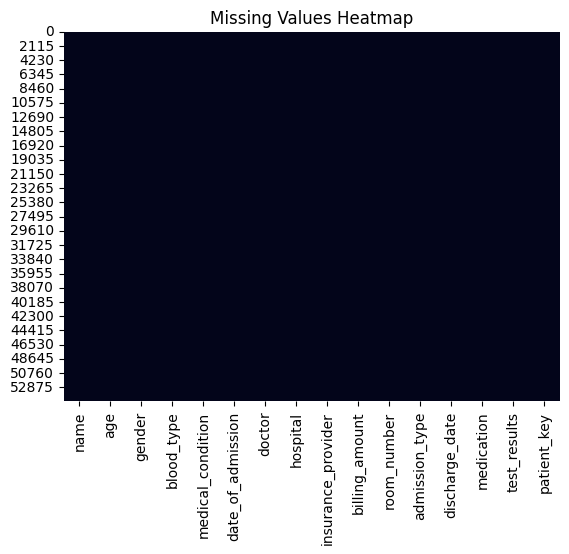

In [13]:
#5. Valeur manquantes
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [14]:
#6. Duplicated rows
print("Duplicated rows:", df.duplicated().sum())
df[df.duplicated()]

Duplicated rows: 0


,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key


In [7]:
#7. Conversion of date columns to datetime format
for col in ['date_of_admission', 'discharge_date']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

df[['date_of_admission', 'discharge_date']].head()


,date_of_admission,discharge_date
0,2024-01-31,2024-02-02
1,2019-08-20,2019-08-26
2,2022-09-22,2022-10-07
3,2020-11-18,2020-12-18
4,2022-09-19,2022-10-09


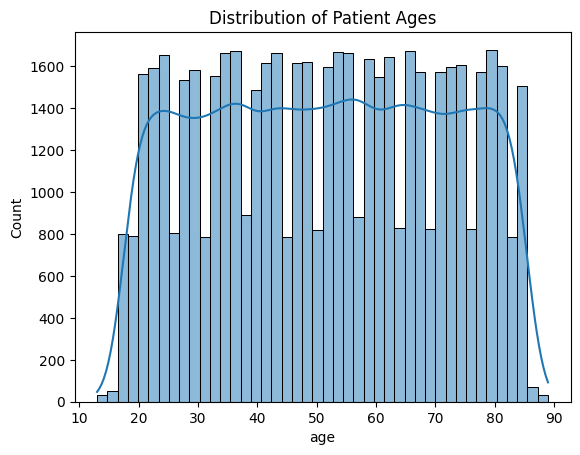

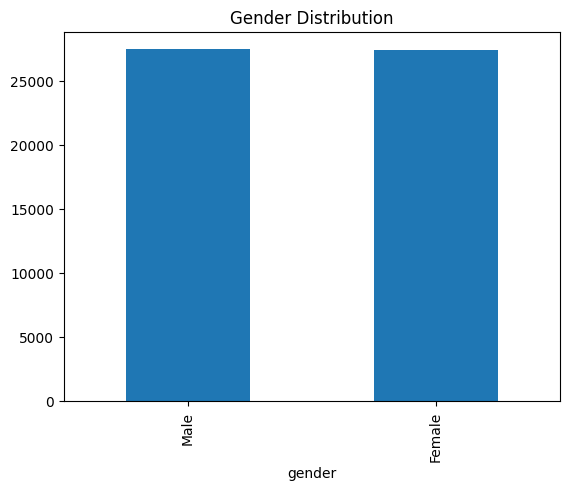

In [8]:
#8. Quick Visualisation
sns.histplot(df['age'], kde=True)
plt.title("Distribution of Patient Ages")
plt.show()

df['gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.show()